<a href="https://colab.research.google.com/github/berayco/hello-world/blob/master/ParsyBot_DersAsistan_DataPrep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install spacy
!python -m spacy download tr_core_news_sm

import spacy
import re
import os
from google.colab import drive

# Google Drive'ı bağla
drive.mount('/content/drive')

# SpaCy için Türkçe işleme özelliklerini kullanmak
nlp = spacy.blank("tr")

# Metni temizleme ve ön işleme fonksiyonu
def preprocess_text(text):
    # Gereksiz karakterleri çıkar
    text = re.sub(r'[^A-Za-ızğüşöçİĞÜŞÖÇ\s]', '', text)
    # Fazladan boşlukları ve satır sonlarını temizle
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# BERT'in token sınırını göz önünde bulundurarak metni parçalara ayırma fonksiyonu
def chunk_text(text, chunk_size=512):
    doc = nlp(text)
    chunks = []

    current_chunk = []
    current_length = 0

    for token in doc:
        # Tokenin uzunluğunu hesapla
        token_length = len(token.text.split())
        if current_length + token_length > chunk_size:
            chunks.append(' '.join(current_chunk))
            current_chunk = []
            current_length = 0
        current_chunk.append(token.text)
        current_length += token_length

    # Kalan son parçayı da ekle
    if current_chunk:
        chunks.append(' '.join(current_chunk))

    return chunks

# PDF metnini okuma
file_path = "/content/drive/MyDrive/parsybot_dersa/pdf_text4.txt"
with open(file_path, 'r') as file:
    text = file.read()

# Metni temizle
cleaned_text = preprocess_text(text)

# Metni parçalara ayır
text_chunks = chunk_text(cleaned_text)

# Çıktı dosyası için isim kontrolü ve oluşturma
output_dir = "/content/drive/MyDrive/parsybot_dersa/"
base_filename = "processed_text_chunks"
extension = ".txt"
iter = 1
output_file = os.path.join(output_dir, base_filename + extension)

# Eğer dosya zaten varsa, ismin sonuna sayı ekleyerek yeni bir isim oluştur
while os.path.exists(output_file):
    output_file = os.path.join(output_dir, f"{base_filename}_{iter}{extension}")
    iter += 1

# Sonuçları yeni dosyaya yaz
with open(output_file, 'w') as file:
    for i, chunk in enumerate(text_chunks):
        file.write(f"Chunk {i + 1}:\n{chunk}\n\n")


2023-12-05 11:09:21.433090: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-05 11:09:21.433173: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-05 11:09:21.433225: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-05 11:09:21.448537: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-05 11:09:23.330403: W tensorflow/compiler/

# Yeni Bölüm

Saving soru_format_son.json to soru_format_son (2).json


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/152 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/485 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/251k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/442M [00:00<?, ?B/s]

Some weights of the model checkpoint at savasy/bert-base-turkish-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1: Training Loss 0.45351245612837376
Epoch 1: Training Loss 0.45351245612837376, Validation Loss 0.00014279325841926038
Epoch 2: Training Loss 0.007541216422396246
Epoch 2: Training Loss 0.007541216422396246, Validation Loss 8.069861845190947e-05
Epoch 3: Training Loss 0.0018745355780993122
Epoch 3: Training Loss 0.0018745355780993122, Validation Loss 8.719491355198745e-05
Epoch 4: Training Loss 0.006399094260996207
Epoch 4: Training Loss 0.006399094260996207, Validation Loss 5.101947196332427e-05
Epoch 5: Training Loss 0.00042419425226398745
Epoch 5: Training Loss 0.00042419425226398745, Validation Loss 2.6702355777767178e-05
Epoch 6: Training Loss 0.00014614112551498694
Epoch 6: Training Loss 0.00014614112551498694, Validation Loss 1.811958766969231e-05
Epoch 7: Training Loss 0.00039204381209856365
Epoch 7: Training Loss 0.00039204381209856365, Validation Loss 1.3291717550600879e-05
Epoch 8: Training Loss 0.0005844790313858539
Epoch 8: Training Loss 0.0005844790313858539, Valid

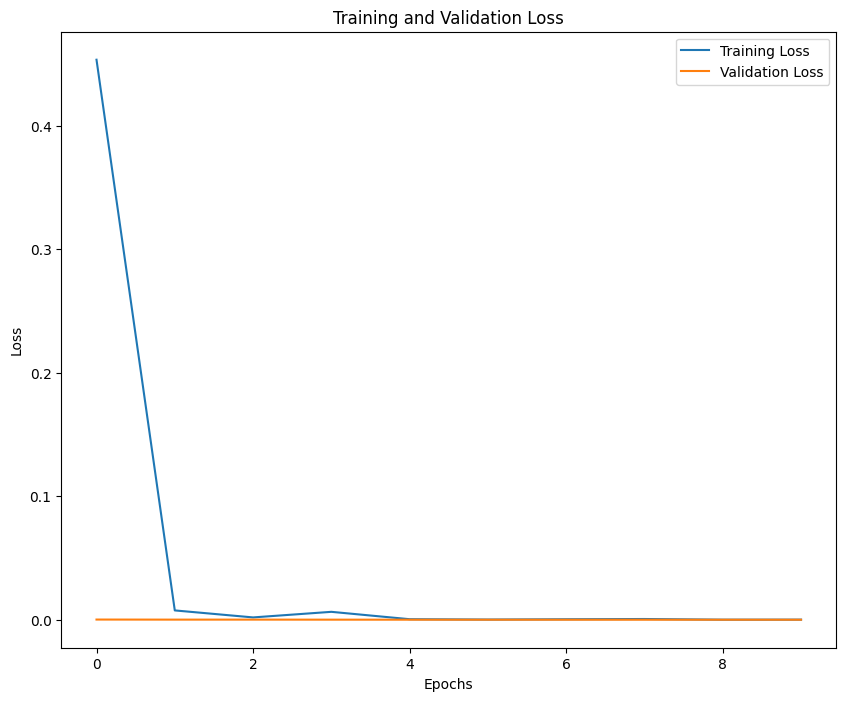

('./egitim_sorucevap/tokenizer_config.json',
 './egitim_sorucevap/special_tokens_map.json',
 './egitim_sorucevap/vocab.txt',
 './egitim_sorucevap/added_tokens.json',
 './egitim_sorucevap/tokenizer.json')

In [4]:
import json
import os

import torch
from torch.optim import AdamW
from torch.utils.data import Dataset, DataLoader, random_split
from transformers import AutoTokenizer, BertForQuestionAnswering
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab import files
uploaded = files.upload()

# JSON dosyasını yüklemek ve veriyi hazırlamak için fonksiyonlar
def load_json(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return json.load(file)


class QuestionAnsweringDataset(Dataset):
    def __init__(self, data, tokenizer, max_length=512):
        self.data = data
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        item = self.data[idx]

        # 'soru_format_son.json' dosyasının formatına göre güncellenmiş kısım
        context = item.get('context', '')  # Eğer 'context' anahtarı yoksa boş string döndür
        question = item.get('question', '')  # Eğer 'question' anahtarı yoksa boş string döndür
        start_position = item.get('start_position', -1)
        end_position = item.get('end_position', -1)

        encoded_input = self.tokenizer.encode_plus(
            question, context,
            add_special_tokens=True,
            truncation=True,
            max_length=self.max_length,
            return_attention_mask=True,
            return_token_type_ids=True,
            padding=False
        )

        return {
            'input_ids': torch.tensor(encoded_input['input_ids'], dtype=torch.long),
            'attention_mask': torch.tensor(encoded_input['attention_mask'], dtype=torch.long),
            'token_type_ids': torch.tensor(encoded_input['token_type_ids'], dtype=torch.long),
            'start_positions': torch.tensor([start_position], dtype=torch.long),
            'end_positions': torch.tensor([end_position], dtype=torch.long)

            # Labels eklemesi yapılabilir
        }



# Veri setini ve DataLoader'ı hazırlama
file_path = "soru_format_son.json"  # Replace with the name of your uploaded file
data = load_json(file_path)
tokenizer = AutoTokenizer.from_pretrained('savasy/bert-base-turkish-squad')
dataset = QuestionAnsweringDataset(data['data'], tokenizer)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

# Eğitim ve validation setlerine ayırma
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=8, shuffle=False)


# Model ve Optimizatörü Hazırlama
model = BertForQuestionAnswering.from_pretrained('savasy/bert-base-turkish-squad')
model.to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))
optimizer = AdamW(model.parameters(), lr=2e-5)

# Loss değerlerini saklamak için listeler
train_losses = []
val_losses = []

# Eğitim ve Validation Döngüsü
for epoch in range(10):
    model.train()
    total_train_loss = 0
    for batch in train_dataloader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(model.device)
        attention_mask = batch['attention_mask'].to(model.device)
        token_type_ids = batch['token_type_ids'].to(model.device)
        start_positions = batch['start_positions'].to(model.device)
        end_positions = batch['end_positions'].to(model.device)
        outputs = model(input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids, start_positions=start_positions, end_positions=end_positions)
        loss = outputs.loss
        total_train_loss += loss.item()
        loss.backward()
        optimizer.step()



    # Eğitim loss'unu kaydet
    avg_train_loss = total_train_loss / len(train_dataloader)
    train_losses.append(avg_train_loss)
    print(f"Epoch {epoch+1}: Training Loss {avg_train_loss}")
 # Validation döngüsü
    model.eval()
    total_val_loss = 0
    with torch.no_grad():
        for batch in val_dataloader:
            input_ids = batch['input_ids'].to(model.device)
            attention_mask = batch['attention_mask'].to(model.device)
            token_type_ids = batch['token_type_ids'].to(model.device)
            start_positions = batch['start_positions'].to(model.device)
            end_positions = batch['end_positions'].to(model.device)
            outputs = model(input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids, start_positions=start_positions, end_positions=end_positions)
            loss = outputs.loss
            total_val_loss += loss.item()

    avg_val_loss = total_val_loss / len(val_dataloader)
    val_losses.append(avg_val_loss)
    print(f"Epoch {epoch+1}: Training Loss {avg_train_loss}, Validation Loss {avg_val_loss}")
# Loss grafiğini çiz
plt.figure(figsize=(10, 8))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()
# Modeli kaydet
output_dir = './egitim_sorucevap/'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# New Section